<a href="https://colab.research.google.com/github/mianzaman/Gen-Ai/blob/main/text_to_image_hugging_face_diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install diffusers transformers accelerate

In [2]:
%pip install Matplotlib

In [4]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [3]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

# Define model IDs

In [23]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"


# Load the pipeline with specified parameters

In [24]:
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

# First prompt for image generation

In [16]:
prompt = """fantasyart, ethereal forest oracle with luminous antlers and glowing eyes, floating above a pool of still water, flowing moss-green robes, ancient runes swirling in the air, fireflies and soft mist, twilight hour, high detail, enchanted mood
"""

# Second prompt for image generation

---



In [13]:
prompt2 = "cyberdreamcore, a lone traveler in a glowing neon-lit Tokyo alley, cybernetic arms, sleek trench coat, reflective sunglasses, rain-soaked ground, vibrant signage, moody lighting, mist, lens flare, ultra-detailed background, cinematic shot"

In [18]:
image1 = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [19]:
image2 = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

# Display the images with its prompt

---



[PROMPT]:  fantasyart, ethereal forest oracle with luminous antlers and glowing eyes, floating above a pool of still water, flowing moss-green robes, ancient runes swirling in the air, fireflies and soft mist, twilight hour, high detail, enchanted mood



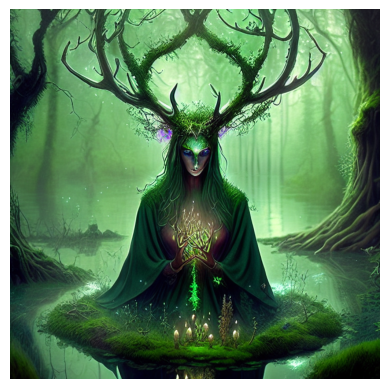

In [20]:
print("[PROMPT]: ",prompt)
plt.imshow(image1);
plt.axis('off');

[PROMPT]:  fantasyart, ethereal forest oracle with luminous antlers and glowing eyes, floating above a pool of still water, flowing moss-green robes, ancient runes swirling in the air, fireflies and soft mist, twilight hour, high detail, enchanted mood



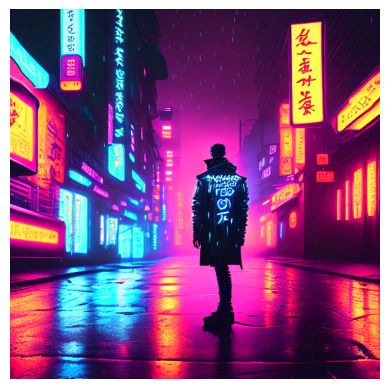

In [21]:
print("[PROMPT]: ",prompt)
plt.imshow(image2);
plt.axis('off');

In [ ]:
print("[PROMPT]: ",prompt)
plt.imshow(image3);
plt.axis('off');

In [11]:
from shlex import join


article = {
	"headline": "How NVIDIA GPUs Could Decide Who Wins the AI Race",
	"keywords": ["ai", "business", "computers"]
}

def create_article_text(article):
	return f"""Headline: {article['headline']}
Keywords: {', '.join(article['keywords'])}"""

article_text = create_article_text(article)

In [12]:
print(article_text)

Headline: How NVIDIA GPUs Could Decide Who Wins the AI Race
Keywords: ai, business, computers


In [19]:
sentiments = [{'label': 'Positive'},
              {'label': 'Neutral'},
              {'label': 'Negative'}]


class_descriptions = [sentiment['label'] for sentiment in sentiments]

In [17]:
print(class_descriptions)

['Positive', 'Neutral', 'Negative']


In [ ]:
ids = []
documents = []

with open('netflix_titles.csv') as csvfile:
  reader = csv.DictReader(csvfile)
  for i, row in enumerate(reader):
    ids.append(row['show_id'])
    text = f"Title: {row['title']} ({row['type']})\nDescription: {row['description']}\nCategories: {row['listed_in']}"
    documents.append(text)

In [ ]:
# Import required libraries
import os
import openai
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import chromadb
from scipy.spatial import distance
from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction

# Initialize your API key
openai_api_key = os.environ["OPENAI_API_KEY"]

EMBEDDING_MODEL = "text-embedding-ada-002"

# Load the dataset
reviews = pd.read_csv("womens_clothing_e-commerce_reviews.csv")
review_texts = reviews["Review Text"].dropna()

# Create and store the embeddings for reviews in one API call
client = openai.OpenAI(api_key=openai_api_key)
responses = client.embeddings.create(input=review_texts.tolist(), model=EMBEDDING_MODEL).model_dump()
embeddings = [response["embedding"] for response in responses["data"]]


# Apply t-SNE for dimensionality reduction
def apply_tsne(embeddings):
    tsne = TSNE(n_components=2, random_state=0)
    return tsne.fit_transform(embeddings)

embeddings_2d = apply_tsne(np.array(embeddings))

# Plotting the results of t-SNE
def plot_tsne(tsne_results):
    plt.figure(figsize=(12, 8))
    for i, point in enumerate(tsne_results):
        plt.scatter(point[0], point[1], alpha=0.5)
        plt.text(point[0], point[1], str(i), fontsize=8, verticalalignment='center')
    plt.title("t-SNE Visualization of Review Embeddings")
    plt.xlabel("t-SNE feature 1")
    plt.ylabel("t-SNE feature 2")
    plt.show()

plot_tsne(embeddings_2d)

# Define topics
categories = ["Quality", "Fit", "Style", "Comfort"]

# Create embeddings for all categories in one API call
category_responses = client.embeddings.create(input=categories, model=EMBEDDING_MODEL).model_dump()

# Extract embeddings from the responses and map them to their respective categories
category_embeddings = [embedding["embedding"] for embedding in category_responses["data"]]


# Function to categorize feedback
def categorize_feedback(text_embedding, category_embeddings):
    similarities = [{"distance": distance.cosine(text_embedding, cat_emb), "index":i}
                     for i, cat_emb in enumerate(category_embeddings)]
    closest = min(similarities, key=lambda x: x["index"])
    return categories[closest["index"]]

# Categorize feedback
feedback_categories = [categorize_feedback(embedding, category_embeddings) for embedding in embeddings]


# Initialize Chromadb instance for vector storage
client = chromadb.PersistentClient()

# Define vector database
review_embeddings_db = client.create_collection(
    name="review_embeddings",
    embedding_function=OpenAIEmbeddingFunction(api_key=openai_api_key))

# Store embeddings inside vector database
review_embeddings_db.add(
    documents=review_texts.tolist(),
    ids=[str(i) for i in range(len(review_texts))]
)

# Function for similarity search using vector db query function
def find_similar_reviews(input_text, vector_db, n=3):
    collection = client.get_collection(
        name="review_embeddings",
        embedding_function=OpenAIEmbeddingFunction(api_key=openai_api_key))
    results = collection.query(
        query_texts=[input_text],
        n_results=n
    )
    return results

# Example feedback and finding similar feedback
example_review = "Absolutely wonderful - silky and sexy and comfortable"
most_similar_reviews = find_similar_reviews(example_review, review_embeddings_db, 3)["documents"][0]
print(most_similar_reviews)

# Clean up
client.delete_collection(name="review_embeddings")
